# Compute repartition of notices across CPV levels

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("tmp/20231020-all_EN_notices_tedAI.csv", dtype=str)
df = df.drop_duplicates(subset=['title', 'short_description'], keep='last')
df.head()

id             type  \
1  538730-2018  contract_notice   
2  658980-2021  contract_notice   
3  380624-2018  contract_notice   
5  398421-2018  contract_notice   
6  398209-2018  contract_notice   

                                               title  \
1  National Framework for Refit and Refurbishment...   
2            Extension to Cullahill Community Centre   
3  Urban Design and Masterplanning Consultancy Se...   
5  The Supply of Materials and Associated Managed...   
6             Catalyst Building Shell and Core Works   

                                   short_description contract_type  main_cpv  \
1  The Red Kite Learning Trust are looking to est...         Works  45453000   
2  Two storey extension to Cullahill Community Ce...         Works  45210000   
3  The establishment of a Framework Agreement for...      Services  79000000   
5  PfH have conducted one procurement exercise to...      Supplies  44111000   
6  Construction of Shell and Core of the new Cata...         Works  45210000   

                                     additional_cpvs publication_date  \
1                45454100,45400000,45454000,45453100         20181207   
2                         45212200,45200000,45212000         20211224   
3                                                NaN         20180831   
5  45410000,42416000,45421151,43300000,44621000,4...         20180913   
6                                                NaN         20180913   

  reference_notice_id         version  ... country language is_eu_institution  \
1                 NaN  R2.0.9.S03.E01  ...     NaN       EN             false   
2                 NaN  R2.0.9.S05.E01  ...     IRL       EN             false   
3                 NaN  R2.0.9.S03.E01  ...     IRL       EN             false   
5                 NaN  R2.0.9.S03.E01  ...     NaN       EN             false   
6                 NaN  R2.0.9.S03.E01  ...     NaN       EN             false   

   year month day  contract_id   ingestion_type           s3_bucket  \
1  2018    12  07  538730-2018  contract_notice  d-ew1-ted-ai-input   
2  2021    12  24  658980-2021  contract_notice  d-ew1-ted-ai-input   
3  2018    08  31  380624-2018  contract_notice  d-ew1-ted-ai-input   
5  2018    09  13  398421-2018  contract_notice  d-ew1-ted-ai-input   
6  2018    09  13  398209-2018  contract_notice  d-ew1-ted-ai-input   

                                         s3_key_path  
1  resource_type=contract_notice/format=xml/year=...  
2  resource_type=contract_notice/format=xml/year=...  
3  resource_type=contract_notice/format=xml/year=...  
5  resource_type=contract_notice/format=xml/year=...  
6  resource_type=contract_notice/format=xml/year=...  

[5 rows x 24 columns]

In [3]:
df["cpvs"] = df["main_cpv"].fillna("") + "," + df["additional_cpvs"].fillna("")
df["cpvs"] = df["cpvs"].apply(lambda c: list(filter(None, c.split(","))))
df = df[["id", "cpvs"]]
df.head()

id                                               cpvs
1  538730-2018  [45453000, 45454100, 45400000, 45454000, 45453...
2  658980-2021           [45210000, 45212200, 45200000, 45212000]
3  380624-2018                                         [79000000]
5  398421-2018  [44111000, 45410000, 42416000, 45421151, 43300...
6  398209-2018                                         [45210000]

In [4]:
df[f"has_level_1"] = df["cpvs"].apply(bool)
for level in range(2, 8):
    df[f"has_level_{level}"] = df["cpvs"].apply(lambda c: any(not x[:level + 1].endswith("0") for x in c))
df.head()

id                                               cpvs  \
1  538730-2018  [45453000, 45454100, 45400000, 45454000, 45453...   
2  658980-2021           [45210000, 45212200, 45200000, 45212000]   
3  380624-2018                                         [79000000]   
5  398421-2018  [44111000, 45410000, 42416000, 45421151, 43300...   
6  398209-2018                                         [45210000]   

   has_level_1  has_level_2  has_level_3  has_level_4  has_level_5  \
1         True         True         True         True         True   
2         True         True         True         True         True   
3         True        False        False        False        False   
5         True         True         True         True         True   
6         True         True         True        False        False   

   has_level_6  has_level_7  
1        False        False  
2        False        False  
3        False        False  
5         True         True  
6        False        False

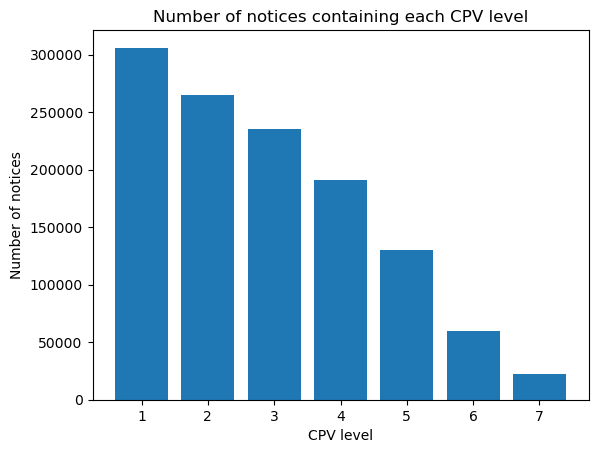

In [5]:
results = {
    level: df[f"has_level_{level}"].sum()
    for level in range(1, 8)
}
plt.bar(results.keys(), results.values())
plt.title("Number of notices containing each CPV level")
plt.xlabel("CPV level")
plt.ylabel("Number of notices")
plt.show()